In [15]:
# Importing required libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
#Loading dataset
data = pd.read_csv("adult23.csv")

# Dataset size
print("TOTAL ROWS x TOTAL COLUMNS:\n", data.shape)

#All Variables
print("\nTOTAL VARIABLES:\n", ', '.join(list(data.columns)))


TOTAL ROWS x TOTAL COLUMNS:
 (29522, 647)

TOTAL VARIABLES:
 URBRRL, RATCAT_A, INCTCFLG_A, IMPINCFLG_A, LANGSPECR_A, LANGSOC_A, LANGDOC_A, LANGMED_A, LANGHM_A, PPSU, PSTRAT, HISPALLP_A, RACEALLP_A, DISAB3_A, SCHDYMSSTC_A, AFNOW, REPWRKDYTC_A, YRSINUS_A, CITZNSTP_A, PRTNREDUCP_A, SPOUSEDUCP_A, LEGMSTAT_A, MARSTAT_A, SASPPRACE_A, SASPPHISP_A, PRTNRAGETC_A, SPOUSAGETC_A, PRTNRWKFT_A, PRTNRWRK_A, SPOUSWKFT_A, SPOUSWRK_A, SPOUSESEX_A, PRTNRSEX_A, INJWRKDYTC_A, NUMINJTC_A, SHINGYEARP_A, HHRESPSA_FLG, PCNTADWFP1_A, PCNTADWKP1_A, FDSCAT4_A, FDSCAT3_A, EPINUMSEZP_A, EMPDYSMSS3_A, EMPLSTWOR1_A, EMPWRKFT1_A, EMPWRKLSW1_A, EMPWKHRS3_A, EMDOCCUPN2_A, EMDOCCUPN1_A, EMDINDSTN2_A, EMDINDSTN1_A, DIBAGETC_A, DIFYRSTC1_A, SMKECIGST_A, SMKCIGST_A, BMICAT_A, WEIGHTLBTC_A, HEIGHTTC_A, URGNT12MTC_A, EMERG12MTC_A, DIBA1CNMT_A, PCNT18UPTC, PCNTLT18TC, PHQ2SCREEN_A, GAD2SCREEN_A, COVER65_A, COVER_A, EXCHANGE_A, NOTCOV_A, MILSPC1R_A, OGFLG_A, OPFLG_A, CHFLG_A, MAFLG_A, PLNWRKR2_A, PLNWRKR1_A, RSNHIMISS_A, RSNHIJ

In [38]:
#Missing Values within columns 
missing_values = data.isna().sum()

total_columns_with_missing_values = (missing_values > 0).sum()
print("\nTotal number of columns with missing values:", total_columns_with_missing_values)


pd.set_option('display.max_rows', None)
print("\nMISSING VALUES WITHIN:\n", missing_values.to_string())


Total number of columns with missing values: 440

MISSING VALUES WITHIN:
 URBRRL               0
RATCAT_A             0
INCTCFLG_A           0
IMPINCFLG_A          0
LANGSPECR_A      25473
LANGSOC_A        25549
LANGDOC_A        25473
LANGMED_A        25473
LANGHM_A          7418
PPSU                 0
PSTRAT               0
HISPALLP_A           0
RACEALLP_A           0
DISAB3_A             0
SCHDYMSSTC_A     27881
AFNOW             8099
REPWRKDYTC_A     28193
YRSINUS_A        24820
CITZNSTP_A           0
PRTNREDUCP_A     27652
SPOUSEDUCP_A     17305
LEGMSTAT_A           0
MARSTAT_A            0
SASPPRACE_A      15434
SASPPHISP_A      15434
PRTNRAGETC_A     27651
SPOUSAGETC_A     17305
PRTNRWKFT_A      28118
PRTNRWRK_A       27660
SPOUSWKFT_A      21989
SPOUSWRK_A       17356
SPOUSESEX_A      17306
PRTNRSEX_A       27651
INJWRKDYTC_A     27562
NUMINJTC_A       27562
SHINGYEARP_A     22275
HHRESPSA_FLG      8637
PCNTADWFP1_A         0
PCNTADWKP1_A         0
FDSCAT4_A            0
FDSCA

In [39]:
# Columns with single entry and missing ones
print("Columns with single values:", data.nunique()[data.nunique() == 1])
print("Entirely missing columns:", data.columns[data.isna().all()])

#Statistical summary of the data
data.describe()

Columns with single values:
 HHRESPSA_FLG    1
MAFLG_A         1
PRFLG_A         1
PRPLCOV1_C_A    1
PRPLCOV2_C_A    1
SRVY_YR         1
CHHDHP_A        1
HHSTAT_A        1
RECTYPE         1
IMPNUM_A        1
dtype: int64
Entirely missing columns: Index(['OGFLG_A', 'OPFLG_A', 'CHFLG_A'], dtype='object')


,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,LANGSPECR_A,LANGSOC_A,LANGDOC_A,LANGMED_A,LANGHM_A,PPSU,...,PHSTAT_A,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,POVRATTC_A
count,29522.000000,29522.000000,29522.000000,29522.000000,4049.000000,3973.000000,4049.000000,4049.000000,22104.000000,29522.000000,...,29522.000000,537.000000,553.000000,29522.000000,29522.0,29522.000000,29522.0,29522.0,29522.000000,29522.000000
mean,2.317119,9.666757,0.041664,0.373721,1.453445,1.480997,1.301309,1.392937,2.063563,31.375246,...,2.460369,1.286778,1.039783,1.205542,1.0,6.472089,10.0,1.0,8747.291918,4.106340
std,1.061522,4.048065,0.199823,0.712244,0.801351,0.790779,0.631127,0.734160,1.287790,29.253976,...,1.074983,0.668921,0.338166,1.087867,0.0,3.444791,0.0,0.0,5690.650182,2.961649
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,10.0,1.0,1792.441000,0.000000
25%,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000,...,2.000000,1.000000,1.000000,1.000000,1.0,3.000000,10.0,1.0,4643.531750,1.800000
50%,2.000000,10.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,24.000000,...,2.000000,1.000000,1.000000,1.000000,1.0,7.000000,10.0,1.0,7374.546000,3.310000
75%,3.000000,14.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,48.000000,...,3.000000,1.000000,1.000000,1.000000,1.0,9.000000,10.0,1.0,10994.809500,5.650000
max,4.000000,14.000000,1.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,153.000000,...,9.000000,4.000000,8.000000,8.000000,1.0,12.000000,10.0,1.0,39925.600000,11.000000


In [19]:
# Step 1: Selecting only numerical data
numerical_data = data.select_dtypes(include=[np.number])
print("Initial shape of numerical data:", numerical_data.shape)


Initial shape of numerical data: (29522, 646)


In [20]:
# Step 2: Dropping columns with all missing values or more than 85% missing values
missing_value_threshold = 0.85
dropped_columns = numerical_data.columns[(numerical_data.isna().mean() > missing_value_threshold) | (numerical_data.isna().all())]
numerical_data = numerical_data.drop(columns=dropped_columns)


In [21]:
# Display remaining columns after dropping
remaining_columns = numerical_data.columns.tolist()
print("\nRemaining columns after dropping those with more than 85% missing values:", remaining_columns)
print("Shape after dropping columns:", numerical_data.shape)


Remaining columns after dropping those with more than 85% missing values: ['URBRRL', 'RATCAT_A', 'INCTCFLG_A', 'IMPINCFLG_A', 'LANGHM_A', 'PPSU', 'PSTRAT', 'HISPALLP_A', 'RACEALLP_A', 'DISAB3_A', 'AFNOW', 'YRSINUS_A', 'CITZNSTP_A', 'SPOUSEDUCP_A', 'LEGMSTAT_A', 'MARSTAT_A', 'SASPPRACE_A', 'SASPPHISP_A', 'SPOUSAGETC_A', 'SPOUSWKFT_A', 'SPOUSWRK_A', 'SPOUSESEX_A', 'SHINGYEARP_A', 'HHRESPSA_FLG', 'PCNTADWFP1_A', 'PCNTADWKP1_A', 'FDSCAT4_A', 'FDSCAT3_A', 'EMPDYSMSS3_A', 'EMPLSTWOR1_A', 'EMPWRKFT1_A', 'EMPWRKLSW1_A', 'EMPWKHRS3_A', 'EMDOCCUPN2_A', 'EMDOCCUPN1_A', 'EMDINDSTN2_A', 'EMDINDSTN1_A', 'SMKECIGST_A', 'SMKCIGST_A', 'BMICAT_A', 'WEIGHTLBTC_A', 'HEIGHTTC_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'PCNT18UPTC', 'PCNTLT18TC', 'PHQ2SCREEN_A', 'GAD2SCREEN_A', 'COVER65_A', 'COVER_A', 'EXCHANGE_A', 'NOTCOV_A', 'PLNWRKR1_A', 'MCADVR_A', 'HICOSTR1_A', 'OTHGOV_A', 'OTHPUB_A', 'IHS_A', 'MILITARY_A', 'CHIP_A', 'MEDICAID_A', 'MEDICARE_A', 'PRIVATE_A', 'EXCHPR1_A', 'EDUCP_A', 'MAXEDUCP_A', 'PARSTAT_A', 

In [23]:
# Step 4: Imputing missing values (if any remain after dropping rows)
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_data.columns)


In [24]:
# Step 5: Correlation analysis to remove highly correlated features (threshold > 0.8)
corr_matrix = numerical_data_imputed.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [col for col in upper_tri.columns if any(upper_tri[col] > 0.8)]
numerical_data_cleaned = numerical_data_imputed.drop(columns=high_corr_features)


In [28]:
# Step 6: Apply VarianceThreshold to remove low variance features
selector = VarianceThreshold(threshold=0.1)
data_selected = selector.fit_transform(numerical_data_cleaned)

# Get selected column names
selected_columns = numerical_data_cleaned.columns[selector.get_support()]
data_selected = pd.DataFrame(data_selected, columns=selected_columns)
print("\nSelected Columns after Variance Threshold:", list(selected_columns))
print("Shape after Variance Threshold:", data_selected.shape)



Selected Columns after Variance Threshold: ['URBRRL', 'RATCAT_A', 'IMPINCFLG_A', 'LANGHM_A', 'PPSU', 'PSTRAT', 'HISPALLP_A', 'RACEALLP_A', 'YRSINUS_A', 'CITZNSTP_A', 'SPOUSEDUCP_A', 'LEGMSTAT_A', 'MARSTAT_A', 'SPOUSAGETC_A', 'SPOUSWRK_A', 'SPOUSESEX_A', 'SHINGYEARP_A', 'PCNTADWFP1_A', 'EMPDYSMSS3_A', 'EMPLSTWOR1_A', 'EMPWRKFT1_A', 'EMPWKHRS3_A', 'EMDOCCUPN2_A', 'EMDOCCUPN1_A', 'EMDINDSTN2_A', 'EMDINDSTN1_A', 'SMKECIGST_A', 'SMKCIGST_A', 'BMICAT_A', 'WEIGHTLBTC_A', 'HEIGHTTC_A', 'URGNT12MTC_A', 'EMERG12MTC_A', 'PCNT18UPTC', 'PCNTLT18TC', 'PHQ2SCREEN_A', 'COVER65_A', 'COVER_A', 'NOTCOV_A', 'PLNWRKR1_A', 'MCADVR_A', 'HICOSTR1_A', 'OTHGOV_A', 'MILITARY_A', 'MEDICAID_A', 'MEDICARE_A', 'PRIVATE_A', 'EXCHPR1_A', 'EDUCP_A', 'MAXEDUCP_A', 'PARSTAT_A', 'OVER65FLG_A', 'NUMCAN_A', 'HISDETP_A', 'REGION', 'INTV_QRT', 'SEX_A', 'AGEP_A', 'HOUGVASST_A', 'HOUYRSLIV_A', 'FLUNCH12M1_A', 'FWIC12M_A', 'INCOTHR_A', 'INCRETIRE_A', 'INCWELF_A', 'INCSSISSDI_A', 'INCSSRR_A', 'INCINTER_A', 'EMDWRKCAT1_A', 'EMDSU

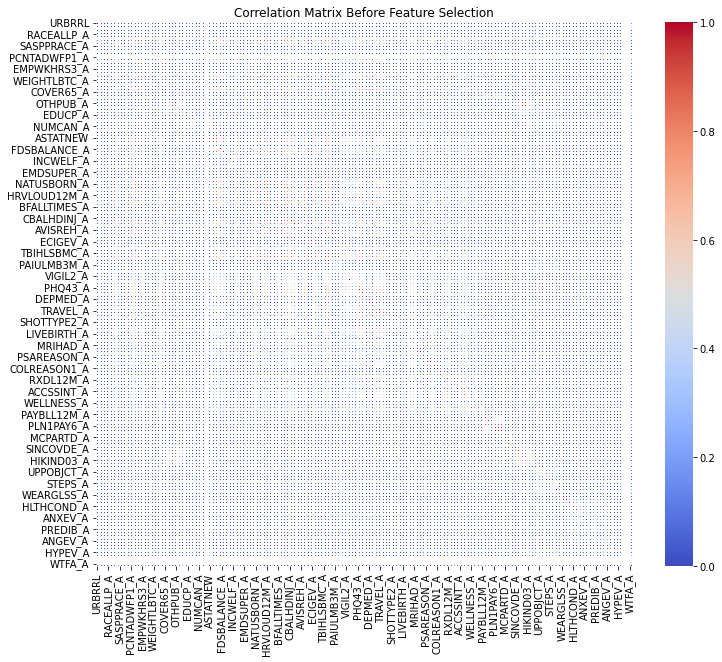

In [30]:
# Visualizing correlation matrix before feature selection
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Before Feature Selection')
plt.show()


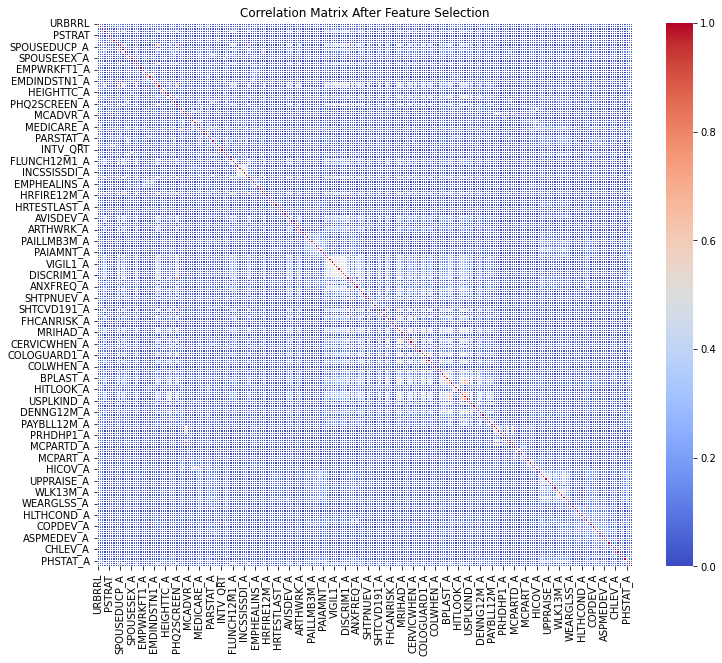

In [29]:
# Visualizing correlation matrix after feature selection
corr_matrix_after_selection = data_selected.corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_after_selection, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix After Feature Selection')
plt.show()

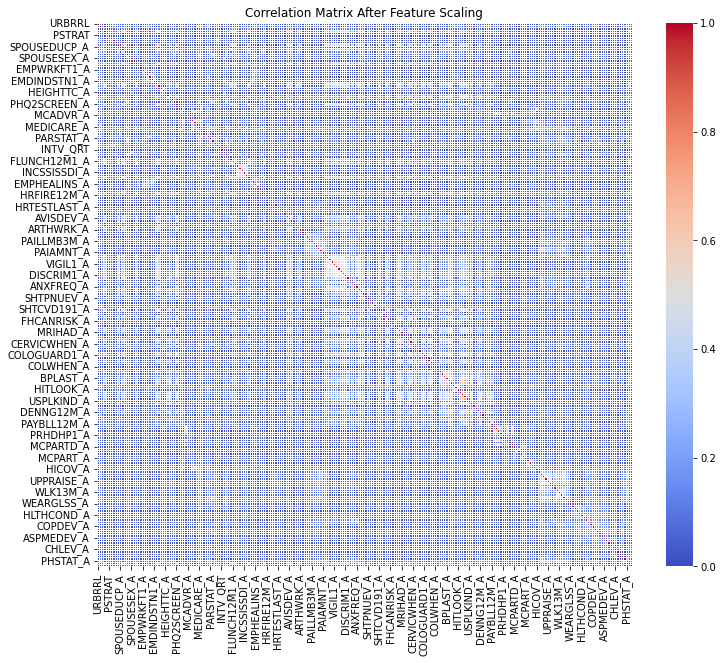

In [31]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Visualizing correlation matrix after feature scaling
corr_matrix_after_scaling = pd.DataFrame(data_scaled, columns=selected_columns).corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_after_scaling, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix After Feature Scaling')
plt.show()


In [34]:
# Step 7: Applying PCA to reduce dimensionality
# Retaining components that explain up to 90% of variance
pca = PCA(n_components=0.90, random_state=42)
data_pca = pca.fit_transform(data_scaled)

# Print original and reduced dimensions
print("Original number of features:", data_scaled.shape[1])
print("Reduced number of features after PCA:", data_pca.shape[1])


Original number of features: 238
Reduced number of features after PCA: 162


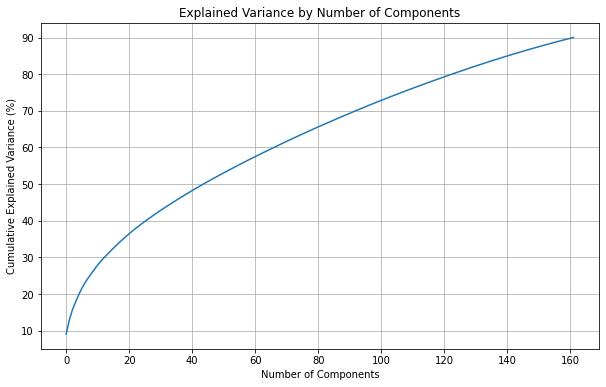

In [35]:
# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

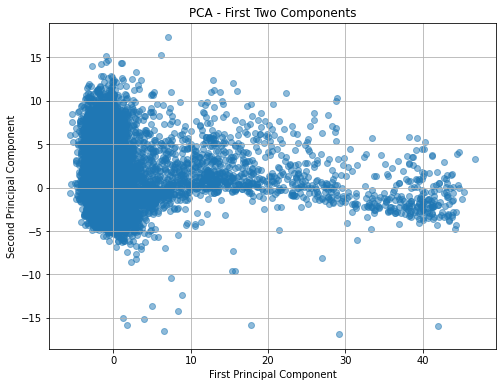

In [36]:
# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First Two Components')
plt.grid(True)
plt.show()

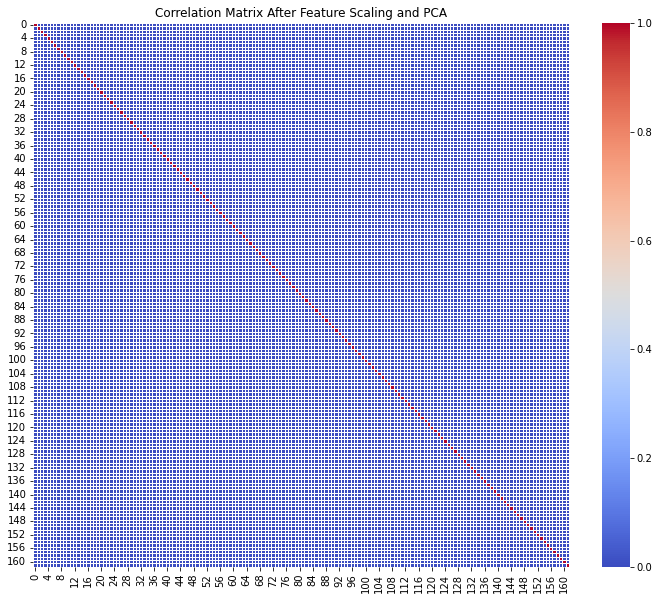

In [37]:
# Visualizing correlation matrix after feature scaling and PCA
pca_data_df = pd.DataFrame(data_pca)
corr_matrix_pca = pca_data_df.corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_pca, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix After Feature Scaling and PCA')
plt.show()